# Linear Regression

In [2]:
# importing libraries
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# define the independent variable
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

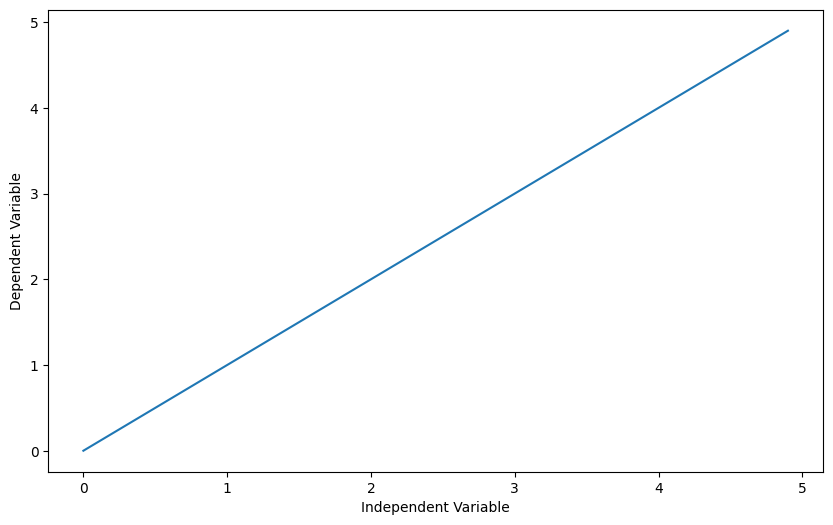

In [5]:
# add slope and intercept to verify the changes in the graph
a = 1
b = 0

Y = a * X + b

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# Linear Regression with TensorFlow

In [7]:
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv"
df = pd.read_csv(url)
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
# Use linear regression to predict Co2Emission of cars based on their engine size.
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

In [13]:
train_x

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

In [10]:
train_y

array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]])

In [14]:
# initialize the variables a & b with any random guess, then define the linear func
a = tf.Variable(20.0)
b = tf.Variable(30.2)

def h(x):
  y = a*x + b
  return y

In [15]:
# define loss function for our regression, so we can train our model to better fitt our data
def loss_object(y, train_y):
  return tf.reduce_mean(tf.square(y - train_y))
  # below is a predefined method offered by TensorFlow to calculate loss function
  # loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

In [16]:
# Use GradientTape to calculate gradients
learning_rate = 0.01
train_data = []
loss_values = []
a_values = []
b_values = []

# steps of looping through all your data to update the parameters 
training_epochs = 200

# train model
for epoch in range(training_epochs):
  with tf.GradientTape() as tape:
    y_predicted = h(train_x)
    loss_value = loss_object(train_y, y_predicted)
    loss_values.append(loss_value)

    # get gradients
    gradients = tape.gradient(loss_value, [b,a])

    # compute and adjust weights
    a_values.append(a.numpy())
    b_values.append(b.numpy())
    b.assign_sub(gradients[0]*learning_rate)
    a.assign_sub(gradients[1]*learning_rate)
    if epoch % 5 == 0:
      train_data.append([a.numpy(), b.numpy()])

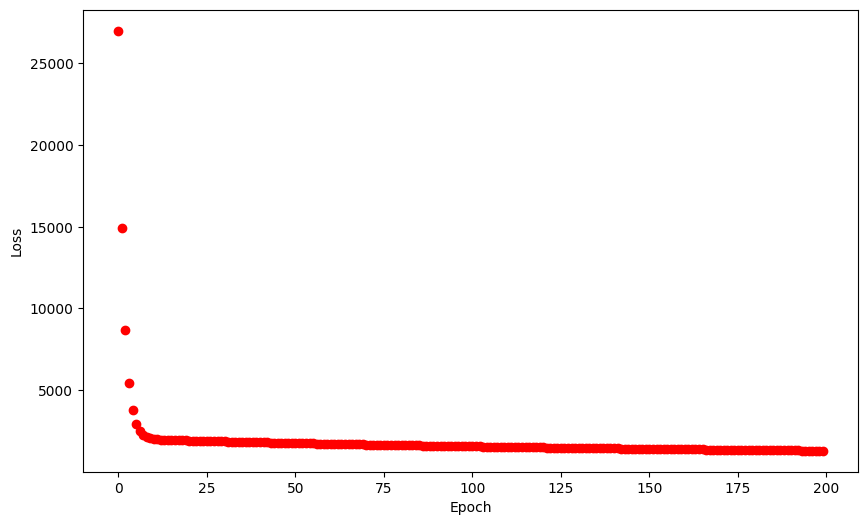

In [18]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')

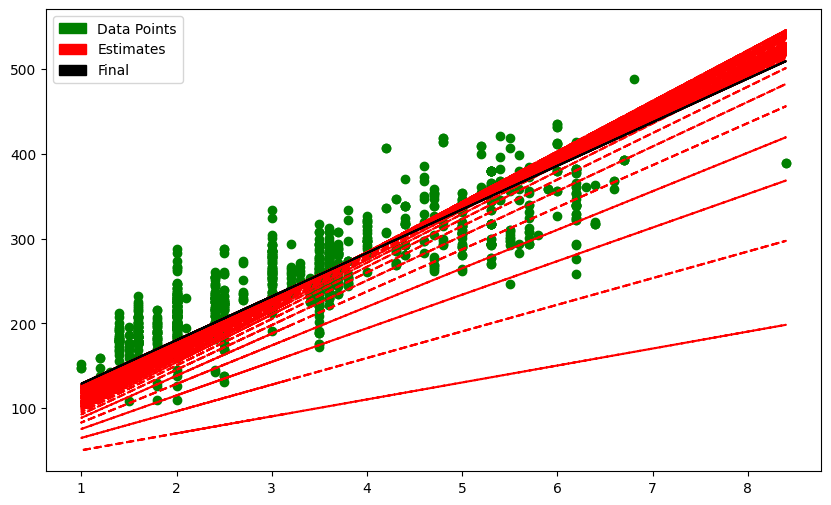

In [19]:
# Visualize how the coefficient and intercept of line has changed to fit the data
# the green dots are the data points, the red lines are created using the a & b coefficients
# during training, and the black line we use to model the relationship with the final/last
# coefficients

plt.scatter(train_x, train_y, color='green')
for a, b in zip(a_values[0:len(a_values)], b_values[0:len(b_values)]):
  plt.plot(train_x, a*train_x+b, color = 'red', linestyle='dashed')
plt.plot(train_x, a_values[-1]*train_x+b_values[-1], color='black')

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Green', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.show()